# Bureau Data

- **What is `BUREAU` data?**
   
   - It is a **Loan data** of each unique customer **with all financial institutions** other than L&T Financial Services. 
   - For each unique `ID` we can have multiple BUREAU IDs, each being a unique loan transaction from other financial institutions availed by the same customer and reported to the bureau.

### Understanding Variables -

- **ID**	Agreement NO (Dummy)
- **SELF-INDICATOR**	This field implies whether Tradeline belong to LTFS or not. In the event of self match value will be "True " else false.
- **MATCH-TYPE**	Type of match for Primary / Secondary or In other words Account of Applicant or CoApplicant
- **ACCT-TYPE**	This field implies an account type assigned by the financial institute to the borrower
- **CONTRIBUTOR-TYPE**	"Whether it’s a government bank, private bank, nbfc etc
    - NBF: Its NBFC
    - MFI:- MircroFiannce Institution (Check column G)
  This field implies the Type of lender who granted the loan."
- **DATE-REPORTED**	This field implies the date up to which information is reported.
- **OWNERSHIP-IND**	This field implies the repayment responsibility
- **ACCOUNT-STATUS**	This field displays the status of loan account.
- **DISBURSED-DT**	This field implies the date of credit disbursement .
- **CLOSE-DT**	This field implies the date of account closure.
- **LAST-PAYMENT-DATE**	This field implies the date of last payment of an installment.
- **CREDIT-LIMIT/SANC AMT**	This field implies the amount that is sanctioned by credit institution or credit limit - incase of credit cards
- **DISBURSED-AMT/HIGH CREDIT**	This field displays Disbursed amount of loan/credit as at the end of reporting period.
- **INSTALLMENT-AMT**	This field implies the Installment/EMI to be paid.
- **CURRENT-BAL**	This field implies the outstanding amount a borrower still owes on a particular credit facilit
- **INSTALLMENT-FREQUENCY**	This field implies the Installment frequency for the account
- **OVERDUE-AMT**	This field implies the amount that has been overdue in the account.
- **WRITE-OFF-AMT**	This field implies the total loan amount written-off by the lender.
- **ASSET_CLASS**	"This field displays classification of the account as either of the following -
    - Standard
    - SubStandard
    - Special Mention Account
    - Loss
    - Doubtful"
- **REPORTED DATE - HIST**	"This field implies the 36 month history of Reported Date History for the particular account.
  "
- **DPD - HIST**	"This field implies the 36 month history of Days Past Due for the particular account.
  - 000 = 0 payments past due (current account)
  - 001 to 999 = Number days past due. If an account is above 999 days, mark as 999
  - XXX = No payment history available prior to this time. An “X” may not be embedded within other values.
  - DDD = No payment history available this month. “D” may be embedded in the payment pattern."
- **CUR BAL - HIST**	This field implies the Current balance history for 36 months.
- **AMT OVERDUE - HIST**	This field implies the Amount Overdue history for 36 months.
- **AMT PAID - HIST**	This field implies the Amount Paid history for 36 months.
- **TENURE**	This field implies the Tenure of the account

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



In [43]:
bureau_train = pd.read_excel("train_bureau.xlsx", sheet_name="Sheet1")
bureau_test = pd.read_excel("test_bureau.xlsx", sheet_name="Sheet1")

In [44]:
train = bureau_train.copy(); test = bureau_test.copy() 

In [45]:
train.head()

,ID,SELF-INDICATOR,MATCH-TYPE,ACCT-TYPE,CONTRIBUTOR-TYPE,DATE-REPORTED,OWNERSHIP-IND,ACCOUNT-STATUS,DISBURSED-DT,CLOSE-DT,...,INSTALLMENT-FREQUENCY,OVERDUE-AMT,WRITE-OFF-AMT,ASSET_CLASS,REPORTED DATE - HIST,DPD - HIST,CUR BAL - HIST,AMT OVERDUE - HIST,AMT PAID - HIST,TENURE
0,1,False,PRIMARY,Overdraft,NAB,2018-04-30,Individual,Delinquent,2015-10-05,NaN,...,NaN,"37,873",0.0,Standard,"20180430,20180331,",030000,"37873,12820,","37873,,",",,",NaN
1,1,False,PRIMARY,Auto Loan (Personal),NAB,2019-12-31,Individual,Active,2018-03-19,NaN,...,F03,NaN,0.0,Standard,"20191231,20191130,20191031,20190930,20190831,2...",0000000000000000000000000000000000000000000000...,"20797,21988,23174,24341,25504,26648,27780,2891...",",,,,,,,,,,,,,,,,,,,,1452,,",",,,,,,,,,,,,,,,,,,,,,,",36.0
2,1,True,PRIMARY,Tractor Loan,NBF,2020-01-31,Individual,Active,2019-08-30,NaN,...,NaN,0,0.0,NaN,"20200131,20191231,20191130,20191031,20190930,2...",000000000000000000,"116087,116087,145000,145000,145000,145000,","0,0,0,0,0,0,",",,,,,,",NaN
3,1,True,PRIMARY,Auto Loan (Personal),NBF,2017-09-30,Individual,Closed,2013-09-27,2017-09-21 00:00:00,...,NaN,0,0.0,NaN,"20170930,20170801,20170731,20170630,20170531,2...",000DDD0270260270260270240270270000320000000000...,"0,,15925,23754,31494,39147,46713,54194,61590,6...","0,,1014,1014,1014,1014,1014,1014,1014,983,0,92...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,",NaN
4,1,True,PRIMARY,Tractor Loan,NBF,2016-02-29,Individual,Closed,2012-02-10,2016-02-01 00:00:00,...,NaN,0,0.0,NaN,"20160229,20160131,20151231,20151130,20151031,2...",0000000000000000000000000000000000000000000000...,"0,0,23658,23321,22989,46321,45662,45012,68030,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,",NaN


In [5]:
test.head()

,ID,SELF-INDICATOR,MATCH-TYPE,ACCT-TYPE,CONTRIBUTOR-TYPE,DATE-REPORTED,OWNERSHIP-IND,ACCOUNT-STATUS,DISBURSED-DT,CLOSE-DT,...,INSTALLMENT-FREQUENCY,OVERDUE-AMT,WRITE-OFF-AMT,ASSET_CLASS,REPORTED DATE - HIST,DPD - HIST,CUR BAL - HIST,AMT OVERDUE - HIST,AMT PAID - HIST,TENURE
0,4,False,PRIMARY,Credit Card,CCC,2019-11-17,Individual,Active,2019-09-26,NaN,...,NaN,0,0.0,NaN,"20191117,",000,"589,","0,","0,",NaN
1,4,False,PRIMARY,Housing Loan,HFC,2019-10-31,Joint,Active,2017-06-21,NaN,...,F03,0,0.0,NaN,"20191031,20190930,20190831,20190731,20190630,2...",0000000000000000000000000000000000000000000000...,"2107227,2122196,2136877,2151448,2165910,218026...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,",120.0
2,4,False,PRIMARY,Property Loan,HFC,2019-10-31,Joint,Active,2017-06-27,NaN,...,F03,0,0.0,NaN,"20191031,20190930,20190831,20190731,20190630,2...",0000000000000000000000000000000000000000000000...,"83458,84051,84632,85209,85781,86349,86913,8747...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,",120.0
3,4,True,PRIMARY,Tractor Loan,NBF,2015-10-31,Individual,Closed,2011-12-29,2015-10-13 00:00:00,...,NaN,0,0.0,NaN,"20151031,20150901,20150831,20150731,20150630,2...",000DDD0270000000000000000000000000000000000000...,"0,,21548,32097,42500,52758,62874,72850,82688,9...","0,,11000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,",NaN
4,5,False,PRIMARY,Gold Loan,PRB,2017-08-31,Individual,Closed,2016-05-04,2017-06-15 00:00:00,...,NaN,0,0.0,NaN,"20170630,20170501,20170401,20170331,20170201,2...",000DDDDDD000DDDDDD000DDDDDD000DDDDDD000,"0,,,25846,,,25846,,,25846,,,25846,","0,,,0,,,0,,,0,,,0",",,,,,,,,,,,,,,",NaN


In [6]:
train.nunique()

ID                           128655
SELF-INDICATOR                    2
MATCH-TYPE                        2
ACCT-TYPE                        50
CONTRIBUTOR-TYPE                 12
DATE-REPORTED                  2652
OWNERSHIP-IND                     5
ACCOUNT-STATUS                   11
DISBURSED-DT                   6279
CLOSE-DT                       4684
LAST-PAYMENT-DATE              4085
CREDIT-LIMIT/SANC AMT           877
DISBURSED-AMT/HIGH CREDIT     72426
INSTALLMENT-AMT               50133
CURRENT-BAL                  147445
INSTALLMENT-FREQUENCY             9
OVERDUE-AMT                   22385
WRITE-OFF-AMT                  1009
ASSET_CLASS                       8
REPORTED DATE - HIST          57846
DPD - HIST                   134338
CUR BAL - HIST               447072
AMT OVERDUE - HIST           187341
AMT PAID - HIST               83417
TENURE                          324
dtype: int64

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64019 entries, 0 to 64018
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ID                         64019 non-null  int64         
 1   SELF-INDICATOR             64019 non-null  bool          
 2   MATCH-TYPE                 64019 non-null  object        
 3   ACCT-TYPE                  64019 non-null  object        
 4   CONTRIBUTOR-TYPE           64019 non-null  object        
 5   DATE-REPORTED              64019 non-null  datetime64[ns]
 6   OWNERSHIP-IND              64019 non-null  object        
 7   ACCOUNT-STATUS             64019 non-null  object        
 8   DISBURSED-DT               63975 non-null  datetime64[ns]
 9   CLOSE-DT                   32566 non-null  object        
 10  LAST-PAYMENT-DATE          31469 non-null  datetime64[ns]
 11  CREDIT-LIMIT/SANC AMT      1598 non-null   object        
 12  DISB

**Feature 1 - Number of Loans exists per Customer ID**

In [46]:
# Number of Loans on train data
loan_counts = train['ID'].value_counts(sort = False).reset_index().rename(index=str, columns={'index' : 'ID', 'ID': 'LOAN_COUNT'})
lc = pd.DataFrame(loan_counts)
lc

,ID,LOAN_COUNT
0,1,9
1,2,13
2,3,31
3,7,4
4,8,7
...,...,...
128650,143390,2
128651,143391,1
128652,143393,4
128653,143394,1


In [47]:
# Loan Count on test data
test_loan_counts = test['ID'].value_counts(sort = False).reset_index().rename(index=str, columns={'index' : 'ID', 'ID': 'LOAN_COUNT'})
test_lc = pd.DataFrame(test_loan_counts)
test_lc

,ID,LOAN_COUNT
0,4,4
1,5,8
2,6,12
3,25,2
4,119,2
...,...,...
14740,143396,39
14741,143397,6
14742,143398,6
14743,143399,16


**Feature 2 - Number of Account Types per Customer ID**

In [48]:
# Number of types of Credit loans for each Customer on train 
loan_type = train[['ID', 'ACCT-TYPE']].groupby(by = ['ID'])['ACCT-TYPE'].nunique().reset_index().rename(
    index=str, columns={'ACCT-TYPE': 'BUREAU_LOAN_TYPE'})
loan_type

,ID,BUREAU_LOAN_TYPE
0,1,4
1,2,7
2,3,8
3,7,2
4,8,3
...,...,...
128650,143390,2
128651,143391,1
128652,143393,2
128653,143394,1


In [11]:
# Number of types of Credit loans for each Customer 
test_loan_type = test[['ID', 'ACCT-TYPE']].groupby(by = ['ID'])['ACCT-TYPE'].nunique().reset_index().rename(
    index=str, columns={'ACCT-TYPE': 'BUREAU_LOAN_TYPE'})
test_loan_type

,ID,BUREAU_LOAN_TYPE
0,4,4
1,5,5
2,6,4
3,25,2
4,119,2
...,...,...
14740,143396,6
14741,143397,4
14742,143398,4
14743,143399,4


**Feature 3 - Average Loan Type**

In [49]:
loan_type['AVERAGE_LOAN_TYPE'] = loan_counts['LOAN_COUNT'] / loan_type['BUREAU_LOAN_TYPE']
# bureau_feat = pd.DataFrame(loan_type)

In [13]:
test_loan_type['AVERAGE_LOAN_TYPE'] = test_lc['LOAN_COUNT'] / test_loan_type['BUREAU_LOAN_TYPE']

In [50]:
bureau_feature = pd.merge(lc, loan_type, how ='inner', on ='ID')

bureau_feature

,ID,LOAN_COUNT,BUREAU_LOAN_TYPE,AVERAGE_LOAN_TYPE
0,1,9,4,2.250000
1,2,13,7,1.857143
2,3,31,8,3.875000
3,7,4,2,2.000000
4,8,7,3,2.333333
...,...,...,...,...
128650,143390,2,2,1.000000
128651,143391,1,1,1.000000
128652,143393,4,2,2.000000
128653,143394,1,1,1.000000


In [15]:
test_bureau_feature = bureau_feature = pd.merge(test_lc, test_loan_type, how ='inner', on ='ID')

test_bureau_feature

,ID,LOAN_COUNT,BUREAU_LOAN_TYPE,AVERAGE_LOAN_TYPE
0,4,4,4,1.0
1,5,8,5,1.6
2,6,12,4,3.0
3,25,2,2,1.0
4,119,2,2,1.0
...,...,...,...,...
14740,143396,39,6,6.5
14741,143397,6,4,1.5
14742,143398,6,4,1.5
14743,143399,16,4,4.0


**Feature 4 - Account Status Features**

In [51]:
train['ACCOUNT-STATUS'].unique()

array(['Delinquent', 'Active', 'Closed', 'SUIT FILED (WILFUL DEFAULT)',
       'Written Off', 'Suit Filed', 'Restructured', 'Settled',
       'WILFUL DEFAULT', 'Cancelled', 'Sold/Purchased'], dtype=object)

Let's understand above terms in details as ,

1. **Closed** - means the customer or Loanee have paid it all loan amount along with interest. And closed respective loan account.

2. **Active** - respective loan account is active and customer is paying regularly installments with regards loan.

3. **Delinquent** -  when borrower make payments late (even by one day) or miss a regular installment payment or payments. In other words, the borrower failed to make their payment on time. 
    - How Delinquency Affects Your Credit Score-
        - Once loan has been delinquent for prescribed limit[vary company to company and country-wise], the lender may report it to the credit bureaus. If the lender does report the delinquency, the extent to which this impacts your credit score depends on many factors. Often, it includes factors such as:
            - The length of the delinquency
            - The type of loan
            - Your business’s credit history.
        - Moreover, according to **Equifax**, the delinquency will stay on your credit report for about seven years [this depends on Company and Country].
        - source - https://www.financialexpress.com/money/loan-restructuring-is-it-right-for-you/2125487/
        
        
    - Consequences of a Delinquent Account
        - Drop in the Credit Score if there is a single delinquent account
        - Multiple delinquent accounts can cause a big drop of about 100 points on your credit score
        - You would need to pay penalty interest or late payment fee
        
        
        source - https://www.creditmantri.com/article-what-is-a-delinquent-loan-difference-between-delinquency-and-default/
        


4. **Written-Off** - it is **Bad Loans** which are dropped from the balance sheets of banks by way of a write-off.

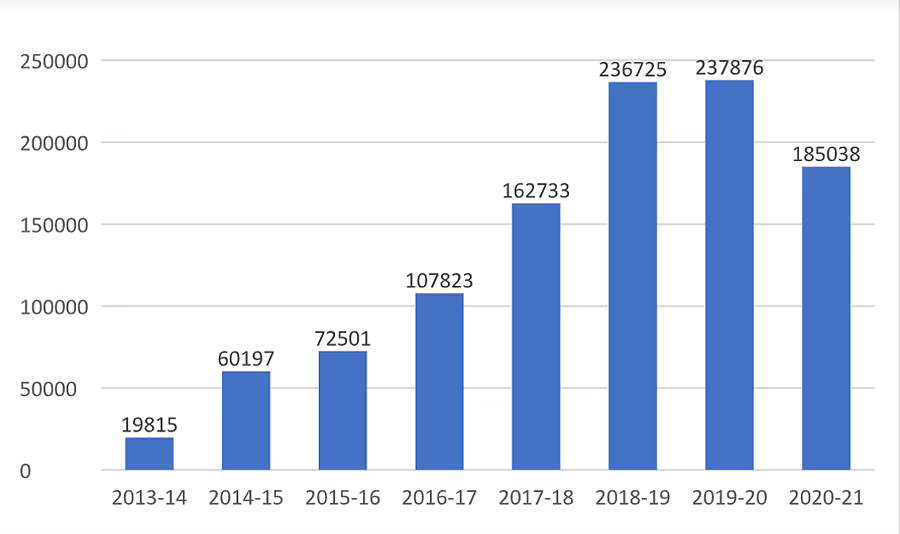

source - https://www.newslaundry.com/2021/07/23/banks-have-written-off-bad-loans-worth-rs-108-lakh-crore-in-last-eight-years


5. **Willful Defaulter** -  a borrower who has the ability to repay the bank but wouldn't so deliberately. Here, the intent to pay back the money to the lender is absent.
    
    - Banks declare a borrower as a wilful defaulter on the basis of evidence about the borrower’s cash situation after a thorough background check.
    - Once the borrower is tagged as a wilful defaulter they cannot avail loans from any other bank.
    
    - source - https://www.moneycontrol.com/news/business/wilful-defaulters-owe-rs-1-5-lakh-crore-to-public-sector-banks-how-big-is-the-mess-5583011.html
    
    
6. **Restructured** - Loan restructuring is **a process** in which borrowers facing **financial distress** **renegotiate and modify** the terms of the loan with the lender to avoid default. It helps **to maintain continuity in servicing the debt and gives borrowers a certain degree of flexibility to restore financial stability**.

    - source - https://www.fullertonindia.com/knowledge-center/loan-restructuring-scheme.aspx

In [52]:
train['ACCOUNT-STATUS'].value_counts()

Closed                         320255
Active                         201897
Delinquent                      32457
Written Off                      2937
Suit Filed                       2062
Settled                           626
Restructured                      511
SUIT FILED (WILFUL DEFAULT)        70
WILFUL DEFAULT                     27
Cancelled                           1
Sold/Purchased                      1
Name: ACCOUNT-STATUS, dtype: int64

In [53]:
train['ACCOUNT-STATUS'].replace(['Suit Filed', 'SUIT FILED (WILFUL DEFAULT)', 'WILFUL DEFAULT']
                                                          ,'Suit Filed (Wilful Default)', inplace=True)

train['ACCOUNT-STATUS'].replace(['Settled', 'Cancelled', 'Sold/Purchased', 'Restructured']
                                                          ,'Settled and Restructured', inplace=True)

In [19]:
test['ACCOUNT-STATUS'].replace(['Suit Filed', 'SUIT FILED (WILFUL DEFAULT)', 'WILFUL DEFAULT']
                                                          ,'Suit Filed (Wilful Default)', inplace=True)

test['ACCOUNT-STATUS'].replace(['Settled', 'Cancelled', 'Sold/Purchased', 'Restructured']
                                                          ,'Settled and Restructured', inplace=True)

In [54]:
train['ACCOUNT-STATUS'].value_counts()

Closed                         320255
Active                         201897
Delinquent                      32457
Written Off                      2937
Suit Filed (Wilful Default)      2159
Settled and Restructured         1139
Name: ACCOUNT-STATUS, dtype: int64

In [21]:
test['ACCOUNT-STATUS'].value_counts()

Closed                         32092
Active                         26946
Delinquent                      4485
Suit Filed (Wilful Default)      225
Written Off                      169
Settled and Restructured         102
Name: ACCOUNT-STATUS, dtype: int64

In [55]:
status = train[['ID','ACCOUNT-STATUS']]
status_encoder = pd.get_dummies(status, prefix = 'Acct_Status_')
status_group = status_encoder.groupby('ID')['Acct_Status__Active', 'Acct_Status__Closed','Acct_Status__Delinquent'
                                            ,'Acct_Status__Settled and Restructured', 'Acct_Status__Suit Filed (Wilful Default)'
                                            ,'Acct_Status__Written Off'].nunique().reset_index().rename(
    index=str, columns={'Acct_Status__Active': 'ACCT_ACTIVE', 'Acct_Status__Closed': 'ACCT_CLOSED'
                        ,'Acct_Status__Delinquent': 'ACCT_DELINQUENT', 'Acct_Status__Written Off' : 'ACCT_WRITTEN_OFF'
                        ,'Acct_Status__Settled and Restructured': 'ACCT_SETTLED AND RESTRUCTURED'
                        ,'Acct_Status__Suit Filed (Wilful Default)' : 'ACCT_SUIT FILLED (WILFUL_DEFAULTER)'})

status_group = pd.DataFrame(status_group)

<ipython-input-55-d3aab090f98a>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  status_group = status_encoder.groupby('ID')['Acct_Status__Active', 'Acct_Status__Closed','Acct_Status__Delinquent'


In [23]:
test_status = test[['ID','ACCOUNT-STATUS']]
test_status_encoder = pd.get_dummies(test_status, prefix = 'Acct_Status_')
test_status_group = test_status_encoder.groupby('ID')['Acct_Status__Active', 'Acct_Status__Closed','Acct_Status__Delinquent'
                                            ,'Acct_Status__Settled and Restructured', 'Acct_Status__Suit Filed (Wilful Default)'
                                            ,'Acct_Status__Written Off'].nunique().reset_index().rename(
    index=str, columns={'Acct_Status__Active': 'ACCT_ACTIVE', 'Acct_Status__Closed': 'ACCT_CLOSED'
                        ,'Acct_Status__Delinquent': 'ACCT_DELINQUENT', 'Acct_Status__Written Off' : 'ACCT_WRITTEN_OFF'
                        ,'Acct_Status__Settled and Restructured': 'ACCT_SETTLED AND RESTRUCTURED'
                        ,'Acct_Status__Suit Filed (Wilful Default)' : 'ACCT_SUIT FILLED (WILFUL_DEFAULTER)'})

test_status_group = pd.DataFrame(test_status_group)

<ipython-input-23-de0b2bc7ba7a>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  test_status_group = test_status_encoder.groupby('ID')['Acct_Status__Active', 'Acct_Status__Closed','Acct_Status__Delinquent'


In [56]:
bureau_feature = pd.merge(bureau_feature, status_group, how ='inner', on ='ID')

bureau_feature


,ID,LOAN_COUNT,BUREAU_LOAN_TYPE,AVERAGE_LOAN_TYPE,ACCT_ACTIVE,ACCT_CLOSED,ACCT_DELINQUENT,ACCT_SETTLED AND RESTRUCTURED,ACCT_SUIT FILLED (WILFUL_DEFAULTER),ACCT_WRITTEN_OFF
0,1,9,4,2.250000,2,2,2,1,1,1
1,2,13,7,1.857143,2,2,1,1,1,1
2,3,31,8,3.875000,2,2,2,1,1,1
3,7,4,2,2.000000,2,2,1,1,1,1
4,8,7,3,2.333333,2,2,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...
128650,143390,2,2,1.000000,1,1,1,1,1,1
128651,143391,1,1,1.000000,1,1,1,1,1,1
128652,143393,4,2,2.000000,2,2,1,1,1,1
128653,143394,1,1,1.000000,1,1,1,1,1,1


In [25]:
test_bureau_feature = pd.merge(test_bureau_feature, test_status_group, how = 'inner', on ='ID')
test_bureau_feature

,ID,LOAN_COUNT,BUREAU_LOAN_TYPE,AVERAGE_LOAN_TYPE,ACCT_ACTIVE,ACCT_CLOSED,ACCT_DELINQUENT,ACCT_SETTLED AND RESTRUCTURED,ACCT_SUIT FILLED (WILFUL_DEFAULTER),ACCT_WRITTEN_OFF
0,4,4,4,1.0,2,2,1,1,1,1
1,5,8,5,1.6,2,2,1,1,1,1
2,6,12,4,3.0,2,2,1,1,1,1
3,25,2,2,1.0,2,2,1,1,1,1
4,119,2,2,1.0,2,2,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
14740,143396,39,6,6.5,2,2,1,1,1,1
14741,143397,6,4,1.5,2,2,1,1,1,1
14742,143398,6,4,1.5,2,2,1,1,1,1
14743,143399,16,4,4.0,2,2,1,1,1,1


**Feature 5 - Current Balance Sum**

In [57]:
balance = train[['ID','CUR BAL - HIST']]
balance

,ID,CUR BAL - HIST
0,1,"37873,12820,"
1,1,"20797,21988,23174,24341,25504,26648,27780,2891..."
2,1,"116087,116087,145000,145000,145000,145000,"
3,1,"0,,15925,23754,31494,39147,46713,54194,61590,6..."
4,1,"0,0,23658,23321,22989,46321,45662,45012,68030,..."
...,...,...
560839,143393,"0,0,,67747,89638,111197,109562,130470,151135,1..."
560840,143393,"0,0,14208,28265,42149,55874,69591,83001,96293,..."
560841,143393,"101687,111161,120514,129749,138867,147870,1567..."
560842,143394,"132487,132487,132487,191426,191426,191426,1914..."


In [58]:
# # for train dataset
balance[['Current_Bal', 'Other_Bal']] = balance['CUR BAL - HIST'].str.split(',', n=1,expand = True)

balance['Current_Bal'] =  pd.to_numeric(balance['Current_Bal'], errors='ignore') # Changing Data Type

# for test Dataset
test[['Current_Bal', 'Other_Bal']] = test['CUR BAL - HIST'].str.split(',', n=1,expand = True)
test['Current_Bal'] =  pd.to_numeric(test['Current_Bal'], errors='ignore') # Changing Data Type

# ncaa[['Win', 'Lose']] = ncaa['Record'].str.split('-', expand=True)

C:\Users\shrib\anaconda3\envs\topUpLoan\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [59]:
balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560844 entries, 0 to 560843
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              560844 non-null  int64  
 1   CUR BAL - HIST  541721 non-null  object 
 2   Current_Bal     504234 non-null  float64
 3   Other_Bal       541721 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 17.1+ MB


In [60]:
# GroupBy Current_Balance sum on basis of "ID"
current = balance.groupby('ID')['Current_Bal'].sum().reset_index().rename(
    index=str, columns={'Current_Bal': 'CURRENT_LOAN_BAL'})
current

,ID,CURRENT_LOAN_BAL
0,1,643176.0
1,2,10349457.0
2,3,2335165.0
3,7,624000.0
4,8,974119.0
...,...,...
128650,143390,1867630.0
128651,143391,73890.0
128652,143393,244133.0
128653,143394,132487.0


In [30]:
# GroupBy Current_Balance sum on basis of "ID"
test_current = test.groupby('ID')['Current_Bal'].sum().reset_index().rename(
    index=str, columns={'Current_Bal': 'CURRENT_LOAN_BAL'})
test_current

,ID,CURRENT_LOAN_BAL
0,4,2191274.0
1,5,907231.0
2,6,102800.0
3,25,127593.0
4,119,116200.0
...,...,...
14740,143396,12259418.0
14741,143397,38441054.0
14742,143398,38441054.0
14743,143399,613508.0


In [61]:
bureau_feature = pd.merge(bureau_feature, current, how ='inner', on ='ID')

bureau_feature


,ID,LOAN_COUNT,BUREAU_LOAN_TYPE,AVERAGE_LOAN_TYPE,ACCT_ACTIVE,ACCT_CLOSED,ACCT_DELINQUENT,ACCT_SETTLED AND RESTRUCTURED,ACCT_SUIT FILLED (WILFUL_DEFAULTER),ACCT_WRITTEN_OFF,CURRENT_LOAN_BAL
0,1,9,4,2.250000,2,2,2,1,1,1,643176.0
1,2,13,7,1.857143,2,2,1,1,1,1,10349457.0
2,3,31,8,3.875000,2,2,2,1,1,1,2335165.0
3,7,4,2,2.000000,2,2,1,1,1,1,624000.0
4,8,7,3,2.333333,2,2,2,1,2,1,974119.0
...,...,...,...,...,...,...,...,...,...,...,...
128650,143390,2,2,1.000000,1,1,1,1,1,1,1867630.0
128651,143391,1,1,1.000000,1,1,1,1,1,1,73890.0
128652,143393,4,2,2.000000,2,2,1,1,1,1,244133.0
128653,143394,1,1,1.000000,1,1,1,1,1,1,132487.0


In [32]:
test_bureau_feature = pd.merge(test_bureau_feature, test_current, how = 'inner', on = 'ID')
test_bureau_feature

,ID,LOAN_COUNT,BUREAU_LOAN_TYPE,AVERAGE_LOAN_TYPE,ACCT_ACTIVE,ACCT_CLOSED,ACCT_DELINQUENT,ACCT_SETTLED AND RESTRUCTURED,ACCT_SUIT FILLED (WILFUL_DEFAULTER),ACCT_WRITTEN_OFF,CURRENT_LOAN_BAL
0,4,4,4,1.0,2,2,1,1,1,1,2191274.0
1,5,8,5,1.6,2,2,1,1,1,1,907231.0
2,6,12,4,3.0,2,2,1,1,1,1,102800.0
3,25,2,2,1.0,2,2,1,1,1,1,127593.0
4,119,2,2,1.0,2,2,1,1,1,1,116200.0
...,...,...,...,...,...,...,...,...,...,...,...
14740,143396,39,6,6.5,2,2,1,1,1,1,12259418.0
14741,143397,6,4,1.5,2,2,1,1,1,1,38441054.0
14742,143398,6,4,1.5,2,2,1,1,1,1,38441054.0
14743,143399,16,4,4.0,2,2,1,1,1,1,613508.0


**Feature 6 - Remaining Loan Tenure**

In [62]:
tenure = train[['ID', 'TENURE']]

In [63]:
tenure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560844 entries, 0 to 560843
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      560844 non-null  int64  
 1   TENURE  192737 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 8.6 MB


In [64]:
active_tenure = tenure.groupby('ID')['TENURE'].sum().reset_index().rename(
    index=str, columns={'TENURE': 'ACTIVE_LOAN_TENURE'})
active_tenure

,ID,ACTIVE_LOAN_TENURE
0,1,120.0
1,2,565.0
2,3,454.0
3,7,33.0
4,8,236.0
...,...,...
128650,143390,121.0
128651,143391,0.0
128652,143393,84.0
128653,143394,0.0


In [36]:
test_active_tenure = test.groupby('ID')['TENURE'].sum().reset_index().rename(
    index=str, columns={'TENURE': 'ACTIVE_LOAN_TENURE'})
test_active_tenure

,ID,ACTIVE_LOAN_TENURE
0,4,240.0
1,5,180.0
2,6,169.0
3,25,0.0
4,119,46.0
...,...,...
14740,143396,397.0
14741,143397,0.0
14742,143398,0.0
14743,143399,0.0


In [65]:
bureau_feature = pd.merge(bureau_feature, active_tenure, how ='inner', on ='ID')

bureau_feature

# bureau_feature = pd.merge(bureau_feature, status_group, how ='inner', on ='ID')

# bureau_feature


,ID,LOAN_COUNT,BUREAU_LOAN_TYPE,AVERAGE_LOAN_TYPE,ACCT_ACTIVE,ACCT_CLOSED,ACCT_DELINQUENT,ACCT_SETTLED AND RESTRUCTURED,ACCT_SUIT FILLED (WILFUL_DEFAULTER),ACCT_WRITTEN_OFF,CURRENT_LOAN_BAL,ACTIVE_LOAN_TENURE
0,1,9,4,2.250000,2,2,2,1,1,1,643176.0,120.0
1,2,13,7,1.857143,2,2,1,1,1,1,10349457.0,565.0
2,3,31,8,3.875000,2,2,2,1,1,1,2335165.0,454.0
3,7,4,2,2.000000,2,2,1,1,1,1,624000.0,33.0
4,8,7,3,2.333333,2,2,2,1,2,1,974119.0,236.0
...,...,...,...,...,...,...,...,...,...,...,...,...
128650,143390,2,2,1.000000,1,1,1,1,1,1,1867630.0,121.0
128651,143391,1,1,1.000000,1,1,1,1,1,1,73890.0,0.0
128652,143393,4,2,2.000000,2,2,1,1,1,1,244133.0,84.0
128653,143394,1,1,1.000000,1,1,1,1,1,1,132487.0,0.0


In [38]:
test_bureau_feature = pd.merge(test_bureau_feature, test_active_tenure, how = 'inner', on = 'ID')
test_bureau_feature

,ID,LOAN_COUNT,BUREAU_LOAN_TYPE,AVERAGE_LOAN_TYPE,ACCT_ACTIVE,ACCT_CLOSED,ACCT_DELINQUENT,ACCT_SETTLED AND RESTRUCTURED,ACCT_SUIT FILLED (WILFUL_DEFAULTER),ACCT_WRITTEN_OFF,CURRENT_LOAN_BAL,ACTIVE_LOAN_TENURE
0,4,4,4,1.0,2,2,1,1,1,1,2191274.0,240.0
1,5,8,5,1.6,2,2,1,1,1,1,907231.0,180.0
2,6,12,4,3.0,2,2,1,1,1,1,102800.0,169.0
3,25,2,2,1.0,2,2,1,1,1,1,127593.0,0.0
4,119,2,2,1.0,2,2,1,1,1,1,116200.0,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14740,143396,39,6,6.5,2,2,1,1,1,1,12259418.0,397.0
14741,143397,6,4,1.5,2,2,1,1,1,1,38441054.0,0.0
14742,143398,6,4,1.5,2,2,1,1,1,1,38441054.0,0.0
14743,143399,16,4,4.0,2,2,1,1,1,1,613508.0,0.0


### sending "new_features" created by using bureau_train data as "csv"

In [66]:
# Converting "bureau_feature" to "CSV" file for bureau_train
bureau_feature.to_csv('train_new_features_from_bureau.csv', sep=',', index=False)


In [67]:
bureau_feature

,ID,LOAN_COUNT,BUREAU_LOAN_TYPE,AVERAGE_LOAN_TYPE,ACCT_ACTIVE,ACCT_CLOSED,ACCT_DELINQUENT,ACCT_SETTLED AND RESTRUCTURED,ACCT_SUIT FILLED (WILFUL_DEFAULTER),ACCT_WRITTEN_OFF,CURRENT_LOAN_BAL,ACTIVE_LOAN_TENURE
0,1,9,4,2.250000,2,2,2,1,1,1,643176.0,120.0
1,2,13,7,1.857143,2,2,1,1,1,1,10349457.0,565.0
2,3,31,8,3.875000,2,2,2,1,1,1,2335165.0,454.0
3,7,4,2,2.000000,2,2,1,1,1,1,624000.0,33.0
4,8,7,3,2.333333,2,2,2,1,2,1,974119.0,236.0
...,...,...,...,...,...,...,...,...,...,...,...,...
128650,143390,2,2,1.000000,1,1,1,1,1,1,1867630.0,121.0
128651,143391,1,1,1.000000,1,1,1,1,1,1,73890.0,0.0
128652,143393,4,2,2.000000,2,2,1,1,1,1,244133.0,84.0
128653,143394,1,1,1.000000,1,1,1,1,1,1,132487.0,0.0


In [68]:
train = pd.read_csv("train_new_features_from_bureau.csv")
train

,ID,LOAN_COUNT,BUREAU_LOAN_TYPE,AVERAGE_LOAN_TYPE,ACCT_ACTIVE,ACCT_CLOSED,ACCT_DELINQUENT,ACCT_SETTLED AND RESTRUCTURED,ACCT_SUIT FILLED (WILFUL_DEFAULTER),ACCT_WRITTEN_OFF,CURRENT_LOAN_BAL,ACTIVE_LOAN_TENURE
0,1,9,4,2.250000,2,2,2,1,1,1,643176.0,120.0
1,2,13,7,1.857143,2,2,1,1,1,1,10349457.0,565.0
2,3,31,8,3.875000,2,2,2,1,1,1,2335165.0,454.0
3,7,4,2,2.000000,2,2,1,1,1,1,624000.0,33.0
4,8,7,3,2.333333,2,2,2,1,2,1,974119.0,236.0
...,...,...,...,...,...,...,...,...,...,...,...,...
128650,143390,2,2,1.000000,1,1,1,1,1,1,1867630.0,121.0
128651,143391,1,1,1.000000,1,1,1,1,1,1,73890.0,0.0
128652,143393,4,2,2.000000,2,2,1,1,1,1,244133.0,84.0
128653,143394,1,1,1.000000,1,1,1,1,1,1,132487.0,0.0


In [39]:
# Converting "bureau_feature" to "CSV" file for bureau_test
test_bureau_feature.to_csv('test_new_features_from_bureau.csv', sep=',', index=False)

,LOAN_COUNT,BUREAU_LOAN_TYPE,AVERAGE_LOAN_TYPE,ACCT_ACTIVE,ACCT_CLOSED,ACCT_DELINQUENT,ACCT_SETTLED AND RESTRUCTURED,ACCT_SUIT FILLED (WILFUL_DEFAULTER),ACCT_WRITTEN_OFF,CURRENT_LOAN_BAL,ID,ACTIVE_LOAN_TENURE


In [40]:
train = pd.read_csv('train_new_features_from_bureau.csv')
train

,LOAN_COUNT,BUREAU_LOAN_TYPE,AVERAGE_LOAN_TYPE,ACCT_ACTIVE,ACCT_CLOSED,ACCT_DELINQUENT,ACCT_SETTLED AND RESTRUCTURED,ACCT_SUIT FILLED (WILFUL_DEFAULTER),ACCT_WRITTEN_OFF,CURRENT_LOAN_BAL,ID,ACTIVE_LOAN_TENURE
